<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Neural Networks

## *Data Science Unit 4 Sprint 2 Assignment 1*

## Define the Following:
You can add image, diagrams, whatever you need to ensure that you understand the concepts below.

### Input Layer:

The input layer represents the data (source dataset) used to predict or generate desired outputs of an artificial neural network.  In practice this the input layer will accept rows or vectors of numerical or numerically encoded values.

### Hidden Layer:

A hidden layer is a set or vector of interim values that are the result of a numerical transformation of the values in our input layer. A neural network can zero or more hidden layers as input data is transformed to a set of output data values.  Hidden layers can't be accessed or manipulated directly - only through the application of the network's numerical transformations.

### Output Layer:

The output layer contains the results of the network process transforming inputs through the layers of the network.  

### Neuron:

A neuron is a node in the network that contains a numerical value.  It is the result of a transformation of a set of inputs or node values from a previous hidden layer in the network.  The transformation is typically a sum of weighted input values in addition to a bias value that is subject to an activation function.

### Weight:

A weight is a factor multiplied to an input in the form of a dataset vector (model input) or an interim node.  It serves as a tuning factor used to transform input data to an output that can be used as a prediction or model result. Weights are adjusted or tuned in order to minimize a cost or loss function.

### Activation Function:

An activation function is appled to a node's value which has been generated by transforming network inputs or inputs from previous hidden layers in network.  The activation determines whether the node is applicable as a model output or for transformation by the next hidden layer in the network (if applicable)

### Node Map:

A node map is visual depiction of a neural network that represents how data is transformed from model inputs to model outputs via zero or more hidden layers

### Perceptron:

A Perceptron is a simple neural network that takes one or more inputs and transforms those inputs as a weighted sum which is applied to an activation function resulting in a model output


## Inputs -> Outputs

### Explain the flow of information through a neural network from inputs to outputs. Be sure to include: inputs, weights, bias, and activation functions. How does it all flow from beginning to end?

In a neural network information flows from a set of inputs and is transformed into a set of outputs.  The transformation algorithm operates in such as to minimize a cost or loss function - usually the calculation of the mean square error between predicted outputs and actual data.

The transformation process comes the form of a sum of weighted inputs (sum of products) plus a bias value.  This result is applied to an activation function that determines if the value is applicable to the next step in the process (either a transformation to a subsequent hidden layer or a resultant set of output values)

## Write your own perceptron code that can correctly classify (99.0% accuracy) a NAND gate. 

| x1 | x2 | y |
|----|----|---|
| 0  | 0  | 1 |
| 1  | 0  | 1 |
| 0  | 1  | 1 |
| 1  | 1  | 0 |

In [1]:
import pandas as pd
import numpy as np
import random

### GENERATE AN INPUT ARRAY

In [2]:
inputs = pd.DataFrame(
    {"x1": [0,1,0,1], "x2": [0,0,1,1], "bias": [3,3,3,3]}
).to_numpy()
inputs

array([[0, 0, 3],
       [1, 0, 3],
       [0, 1, 3],
       [1, 1, 3]])

### GENERATE AN OUTPUT ARRAY

In [3]:
outputs = pd.DataFrame(
    {"y": [1,1,1,0]}
).to_numpy()
outputs

array([[1],
       [1],
       [1],
       [0]])

### GENERATE AN INITIAL SET OF WEIGHTS

In [4]:
weights = pd.DataFrame(
    {"weights": [random.uniform(-0.2, 0.25) for i in range(3)]}
).to_numpy()
weights

array([[-0.04781519],
       [-0.19934851],
       [-0.07802887]])

### DEFINE ACTIVATION & DERIVATIVE FUNCTIONS

In [5]:
# Sigmoid function to serve as activation function
def sigmoid(arr: np.array):
    return 1/(1+np.exp(-arr))

# Derivative of the sigmoid function for use in updating weights
def sigmoid_derivative(arr: np.array):
    sx = sigmoid(arr)
    return sx * (1 - sx)

### DEFINE THE ITERATION PROCESS

In [6]:
for iteration in range(100000):
    # WEIGHTED SUM OF INPUTS & WEIGHTS
    weighted_sum = np.dot(inputs, weights)
    
    # ACTIVATE OUTPUTS
    activate_output = sigmoid(weighted_sum)
    
    # CALCULATE ERROR ADJUSTMENTS
    error = outputs - activate_output
    adjustments = error * sigmoid_derivative(weighted_sum)
    
    # TWEAK WEIGHTS
    weights += np.dot(inputs.T, adjustments)

In [7]:
print("Weights after training")
print(weights)

print("Output after training")
print(activate_output)

Weights after training
[[-11.02472673]
 [-11.02472673]
 [  5.56426595]]
Output after training
[[0.99999994]
 [0.99655735]
 [0.99655735]
 [0.00469454]]


## Implement your own Perceptron Class and use it to classify a binary dataset: 
- [The Pima Indians Diabetes dataset](https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv) 

You may need to search for other's implementations in order to get inspiration for your own. There are *lots* of perceptron implementations on the internet with varying levels of sophistication and complexity. Whatever your approach, make sure you understand **every** line of your implementation and what its purpose is.

In [10]:
import pandas as pd

diabetes = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Although neural networks can handle non-normalized data, scaling or normalizing your data will improve your neural network's learning speed. Try to apply the sklearn `MinMaxScaler` or `Normalizer` to your diabetes dataset. 

In [11]:
# Make a copy of the diabetes dataset
df_dbtes_work = diabetes.copy()

In [12]:
# Add a "bias" column
df_dbtes_work["bias"] = np.ones(len(df_dbtes_work))

In [13]:
df_dbtes_work.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'bias'],
      dtype='object')

In [14]:
# Specify the features and target dataframe columns
features = [
    'Pregnancies', 
    'Glucose', 
    'BloodPressure', 
    'SkinThickness', 
    'Insulin',
    'BMI', 
    'DiabetesPedigreeFunction', 
    'Age', 
    'bias']

target = ['Outcome']

In [15]:
df_X = df_dbtes_work[features]
df_y = df_dbtes_work[target]

In [16]:
from sklearn.preprocessing import MinMaxScaler, Normalizer

scaler = MinMaxScaler()

df_X_scld = pd.DataFrame(scaler.fit_transform(df_X), columns=df_X.columns)

X = df_X_scld.to_numpy()
y = df_y.to_numpy()

In [17]:
##### Update this Class #####
import numpy as np
import random

class Perceptron:
    
    def __init__(self, rate = 0.01, niter = 10):
        # Set the class's learning rate
        self.rate = rate
        # Set the class's number of iterations
        self.niter = niter
    
    def __sigmoid(self, x):
        sgmd = 1 / (1 + np.exp(-x))
        return sgmd
    
    def __sigmoid_derivative(self, x):
        sgm = self.__sigmoid(x)
        return (sx * (1 - sx))

    def fit(self, X, y):
        """Fit training data
        X : Training vectors, X.shape : [#samples, #features]
        y : Target values, y.shape : [#samples]
        """
        # Initialize set of weights to zero(s)
        #  -> a filled out array of zeroes of length: 1 + num of 
        self.weight = np.zeros(1 + X.shape[1])
        
        # Number of misclassfications
        self.errors = []
        
        # Iterate through epochs to fit the model
        for i in range(self.niter):
            err = 0
            
            for x_row, y_val in zip(X, y):
                # Calculate the change in weight for each iteration
                wgt_delta = self.rate * (y_val - self.predict(x_row))
                
                self.weight[1:] += wgt_delta * x_row
                self.weight[0]  += wgt_delta
                
                err += int(wgt_delta != 0.0)
                
            self.errors.append(err)
            
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.weight[1:]) + self.weight[0]
    
    def predict(self, X):
        """Return class label after unit step"""
        """ Default Step Function"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [18]:
# Create a new Perceptron class
prcpt = Perceptron(rate=0.01, niter=200)

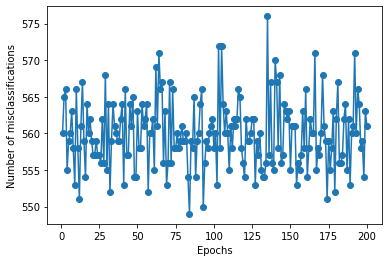

In [19]:
import matplotlib.pyplot as plt
prcpt.fit(X, y)
plt.plot(range(1, len(prcpt.errors) + 1), prcpt.errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

## Stretch Goals:

- Research "backpropagation" to learn how weights get updated in neural networks (tomorrow's lecture). 
- Implement a multi-layer perceptron. (for non-linearly separable classes)
- Try and implement your own backpropagation algorithm.
- What are the pros and cons of the different activation functions? How should you decide between them for the different layers of a neural network?